In [1]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import pandas as pd
import math

In [42]:
# We've loaded the modified csv file of Maharashtra which contains 2 columns - MU and period

# Change the file name to 'MPmodified.csv' or 'TNmodified.csv' to do auto regression for that particular state

newFile="UPmodified.csv"
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
df1 = pd.read_csv(newFile)
df1.head()

,MU,period
0,82.6,2013/4/1
1,82.6,2013/4/2
2,78.9,2013/4/3
3,79.5,2013/4/4
4,77.3,2013/4/5


In [43]:
X = df1['MU']

In [44]:
# First 4 financial years(2013 April to 2017 March) into train data , Last year(2017 April to 2018 March) into Test data

#Check the row in the modified csv file for that particular state corresponding to 31-03-2017

train= X[0:1445]
test=X[1445:]

In [45]:

predictions = list()
#predictions.append(train[len(train)-1])
test=list(test)

# We make a prediction for each of the test values

for t in range(len(test)):
        
        yhat = train[len(train)-364+t]
    
        predictions.append(yhat)

# The root mean square error is obtained for the predicted and test values



In [46]:
error = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

Test RMSE: 20.968


<Figure size 1600x1200 with 0 Axes>

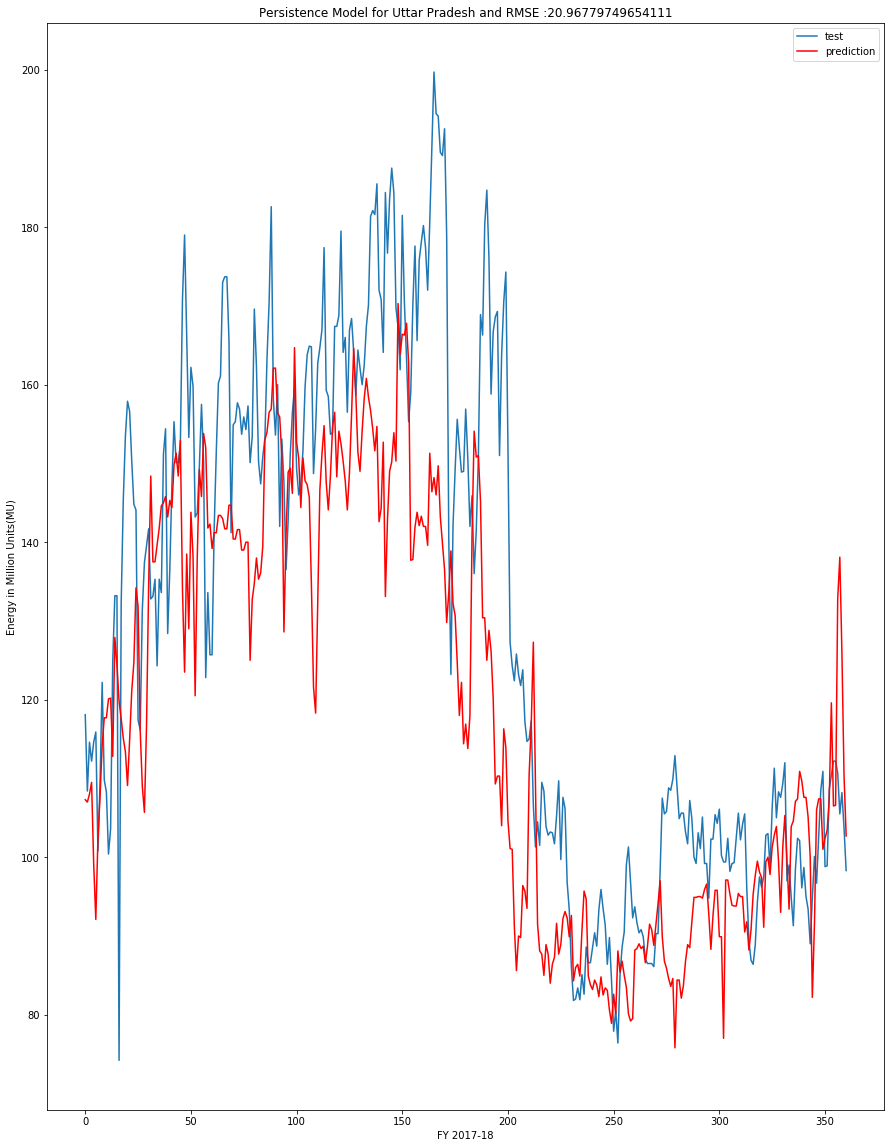

In [47]:
# Made a plot out of the test data and prediction data for the 2017-18 FY

figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
pyplot.figure(figsize=(15,20))
pyplot.plot(test,label='test')

pyplot.plot(predictions, color='red',label='prediction')
pyplot.legend()
pyplot.title("Persistence Model for Uttar Pradesh and RMSE :"+ str(error))
pyplot.xlabel('FY 2017-18')
pyplot.ylabel('Energy in Million Units(MU)')
pyplot.show()